In [277]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import imageio.v2 as imageio
import os
from os import listdir
import shutil

![](Batch_Perceptron_Algorithm.png)

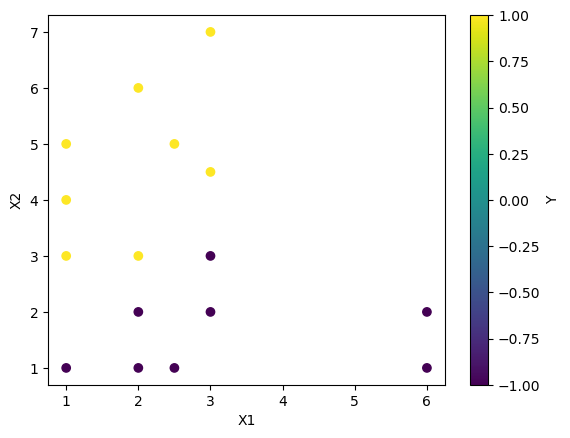

In [278]:
# Hard-coded realiable dataset for basic functionality testing
dim2_realizable = pd.read_csv('dim2_test.csv')

plt.scatter(dim2_realizable['X1'], dim2_realizable['X2'], c=dim2_realizable['Y'], cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar(label='Y')
plt.show()

In [279]:
# Convert to list of tuples: (np.array([X1, X2]), np.array([Y]))
sample_data = [(np.array([row.X1, row.X2]), np.array([row.Y])) for _, row in dim2_realizable.iterrows()]

In [ ]:
def plot_halfspace_2D(sample_data, weights, mistake_count, current_sample):

    # Extract Xs
    X = np.array([x for x, y in sample_data])
    # Extract Ys
    Y = np.array([y for x, y in sample_data])
    # Get min and max for each dimension
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()

    # Optional: pad the limits a bit for visual clarity
    padding = 0.5
    x1_lim = (x1_min - padding, x1_max + padding)
    x2_lim = (x2_min - padding, x2_max + padding)

    # Generalized x range from data
    x_vals = np.linspace(x1_min - padding, x1_max + padding, 200)

    y_vals = -weights[0]/weights[1] * x_vals

    plt.clf() # clear figure
    plt.xlim(x1_lim)
    plt.ylim(x2_lim)
    plt.plot(x_vals, y_vals, 'k--', label='Decision boundary')
    plt.scatter(X[:,0], X[:,1], c=Y, cmap='viridis')
    if current_sample is not None:
        # Highlight the current sample
        plt.scatter(current_sample[0][0], current_sample[0][1], color='red', s=100, label='Current Sample', edgecolor='black')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.colorbar(label='Y')
    plt.title("Perceptron Decision Boundary in X1–X2 Plane")
    plt.grid(True)
    plt.legend()

    # Save plot with mistake number as index
    plt.savefig("process_pngs/image{i}.png".format(i=mistake_count))


In [281]:
def run_perceptron(sample_data, max_epochs=100, shuffle=True):

    # Clear directory for images
    if os.path.exists('process_pngs'):
        shutil.rmtree('process_pngs', ignore_errors=True)
    # Recreate the folder
    os.makedirs('process_pngs')

    # Init weight vector
    w_t = np.zeros(np.shape(sample_data[0][0])[0])

    mistake_index = 0

    for epoch in range(max_epochs):
        if epoch % 10 == 0:
            print(f"Epoch: {epoch}")

        if shuffle:
            random.shuffle(sample_data)  # Avoid fixed update paths

        no_mistakes = True
        
        # Init count vector to know if all samples were correct -> return weight vector
        # Check if there exists a sample i that is mislabeled (mistake bound algorithm)
        # Assume one batch here, so just iterate over samples and 
        for x_i, y_i in sample_data:
            # Dot product checks how aligned the weight vector (half space divider) is with the sample x_i
            if y_i * np.dot(w_t, x_i) <= 0:
                # Update weight vector in correct decision
                w_t += y_i*x_i
                no_mistakes = False  # A mistake was made
                mistake_index += 1

                plot_halfspace_2D(sample_data, w_t, mistake_index, current_sample=(x_i,y_i))

        if no_mistakes:
            plot_halfspace_2D(sample_data, w_t, mistake_index, current_sample=None)
            print(f"Converged after {epoch + 1} epochs")
            break  # Stop if all predictions were correct


    # If all are correct (realizable assumption)
    return w_t

In [282]:
# Animate mistake frames of perceptron update
def animate_perceptron_updates():
    png_dir = 'process_pngs'
    png_files = sorted(
        [f for f in listdir(png_dir) if f.endswith('.png')],
        key=lambda x: int(''.join(filter(str.isdigit, x)))  # sort by mistake_index
    )

    # Read images
    ims = [imageio.imread(os.path.join(png_dir, f)) for f in png_files]
    imageio.mimwrite('perceptron_animation.gif', ims, duration = 30, fps = 0.5)

Epoch: 0
Converged after 2 epochs
Final weights: [-5.5  4.5]


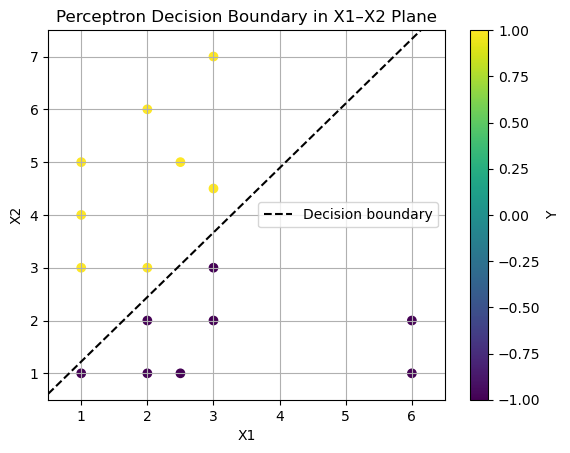

In [283]:
weights = run_perceptron(sample_data)
print("Final weights:", weights)
animate_perceptron_updates()

In [284]:
# Generalize data generation to n-dimensions - linearly separable data
def generate_realiable_halfspace(n_samples, n_dim):
    # Generate random points in n-dimensional space
    X = np.random.uniform(0, 8, (n_samples, n_dim))
    
    # Generate a random weight vector and bias
    weight_vector = np.random.uniform(-10, 10, n_dim)
    bias = np.random.uniform(-5, 5)
    
    # Compute the labels: sign of (dot product + bias)
    Y = np.sign(np.dot(X, weight_vector) + bias)
    
    # Ensure no label is zero (just in case any point lies exactly on the hyperplane)
    Y[Y == 0] = 1

    # Return as list of (x, y) tuples
    data = [(X[i], int(Y[i])) for i in range(n_samples)]
    
    return data, weight_vector

Epoch: 0
Converged after 3 epochs


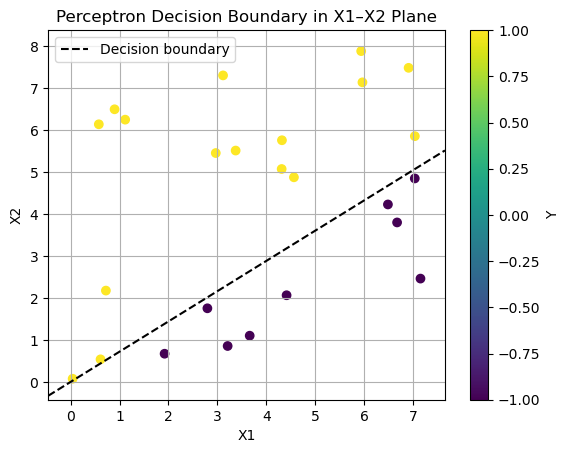

In [289]:
# Test with 2-dimensional randomly generated data
dim2_realizable_rand, weight_solution = generate_realiable_halfspace(25, 2)
#plot_halfspace_2D(dim2_realizable_rand, weight_solution, 0)

# Run perceptron on random data
weights_rand = run_perceptron(dim2_realizable_rand)

In [ ]:
# TODO: Generalize plotting to 3-dim and plane as learning bound
# TODO: Improve data generation to ensure not all one-class points
# TODO: Add proof of upper bound for perceptron convergence and test empirically
# TODO: Plot weight vector (normal to decision boundary)